In [45]:
import pylab as pl
%pylab inline
import numpy as np
import pandas 
import regressData as data
import ridgeRegression as rr
import gradientDescent as gd

Populating the interactive namespace from numpy and matplotlib


1. Implement ridge regression (see Bishop equation 3.27, 3.28); the closed-form solution for the optimal solution of ridge regression is easy to calculate so do not use gradient descent for 3.1 and 3.2.  Use the polynomial basis function for 3.1 and 3.2. Experiment with different values of $\lambda$ on the simple data from the previous question (curvefittingp2.txt), for various values of $M$. Describe your observations.

    - BISHOP 3.27: $\frac{1}{2} \sum_{n = 1}^{N} \{t_n - w^{T}\phi(x_n)\}^2 + \frac{\lambda}{2}w^{T}w$ 

    - BISHOP 3.28: $w = (\lambda I + \phi^{T}\phi)^{-1}\phi^{T}t$



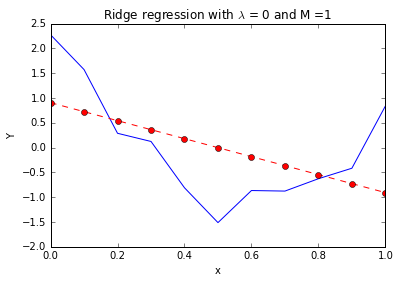

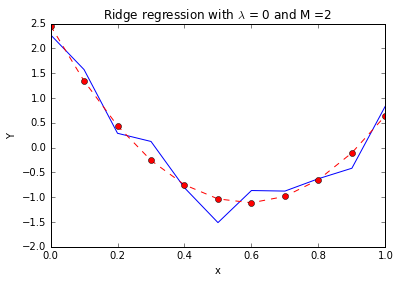

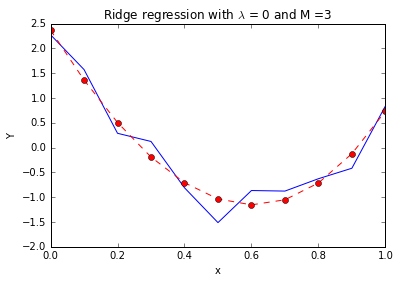

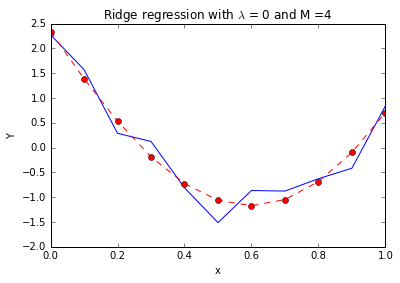

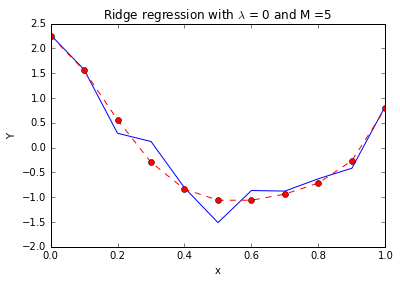

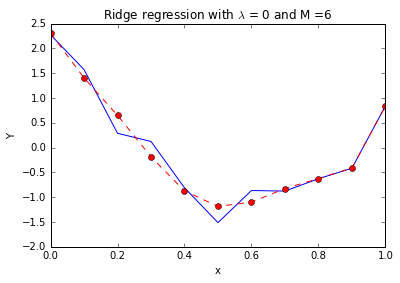

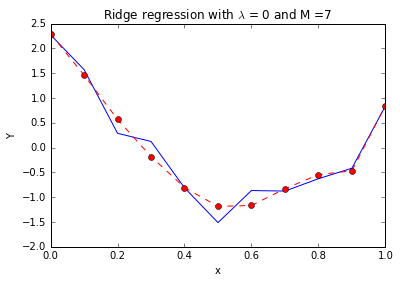

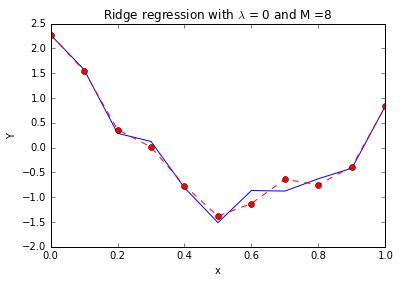

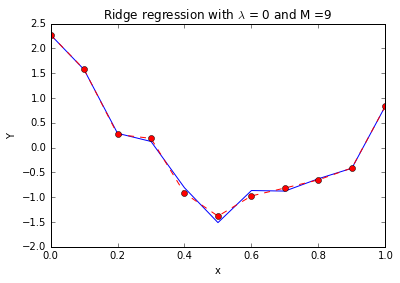

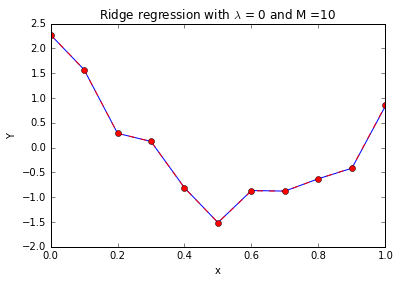

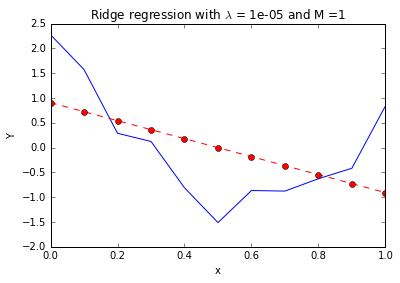

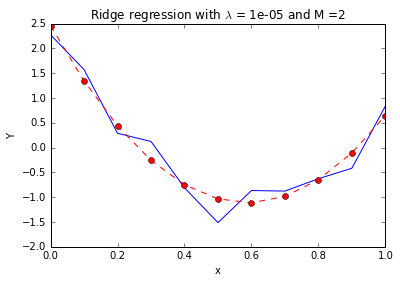

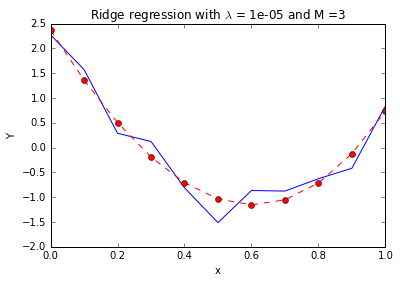

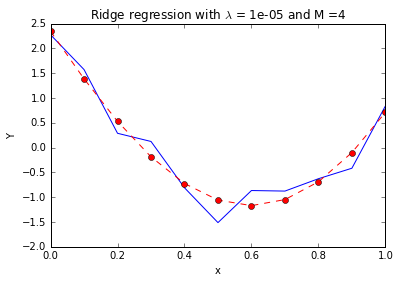

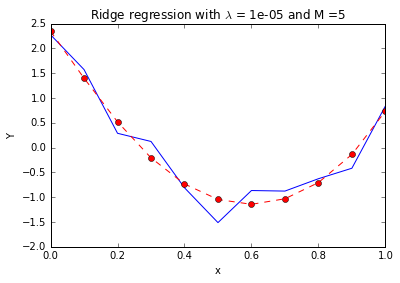

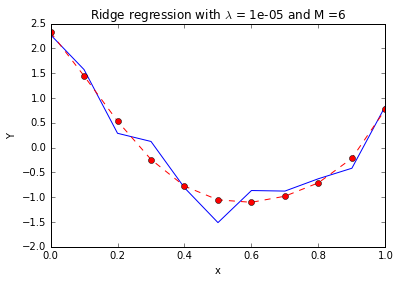

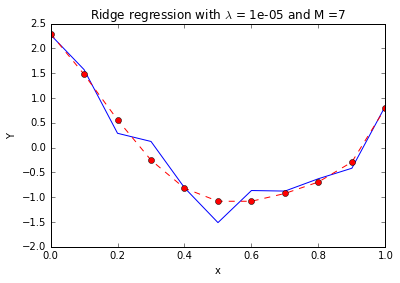

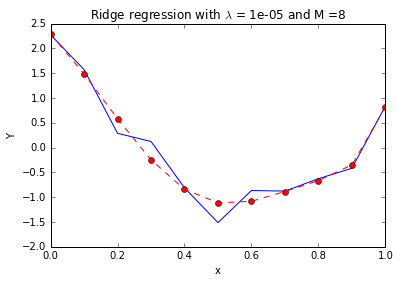

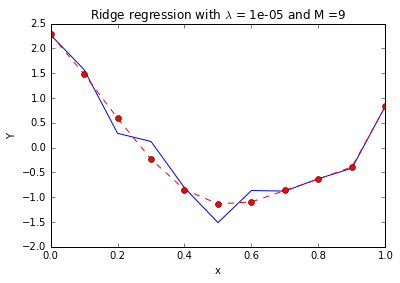

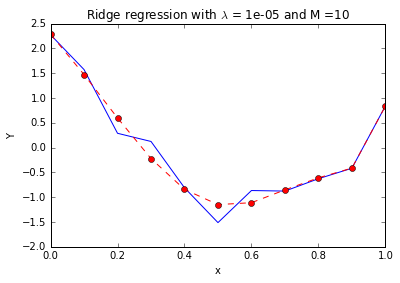

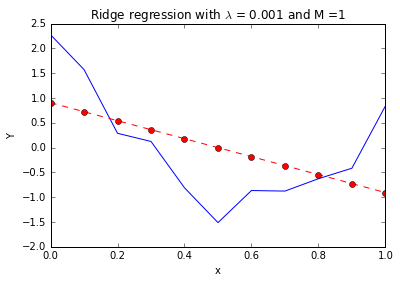

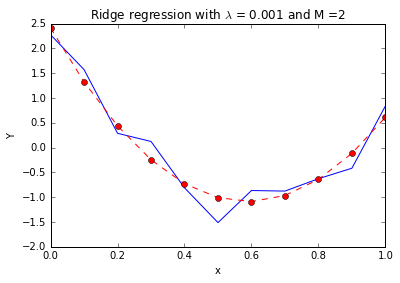

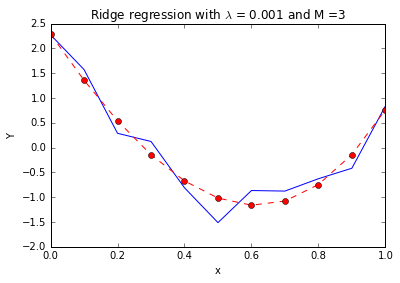

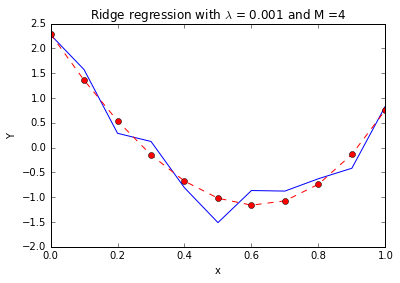

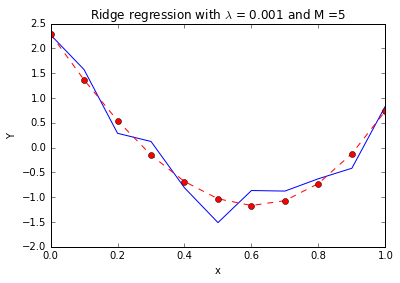

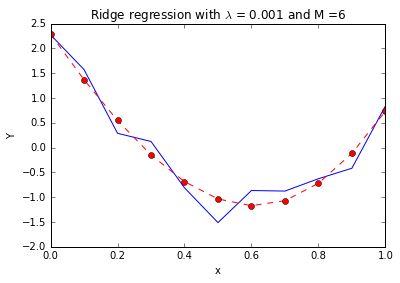

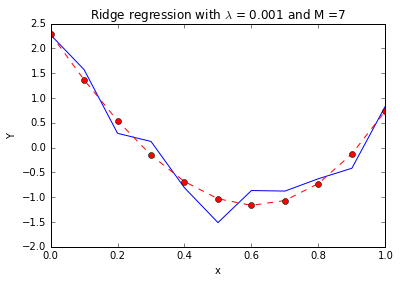

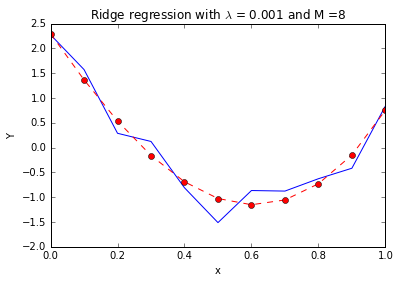

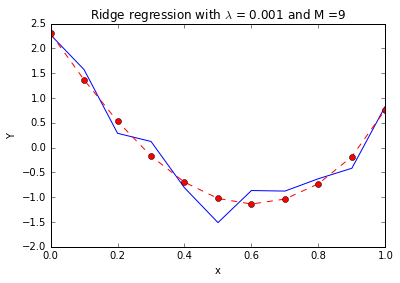

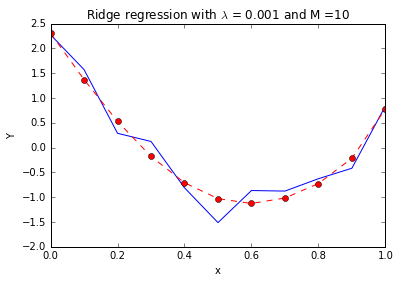

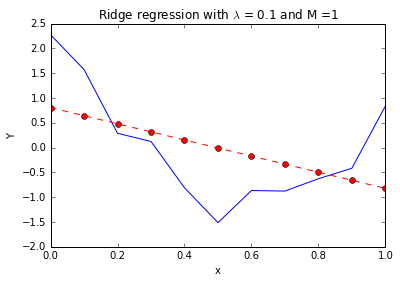

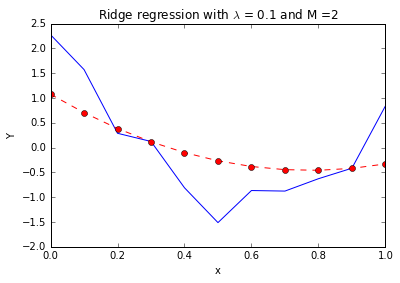

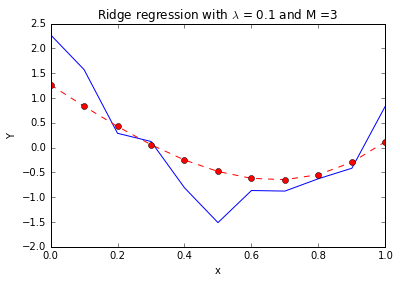

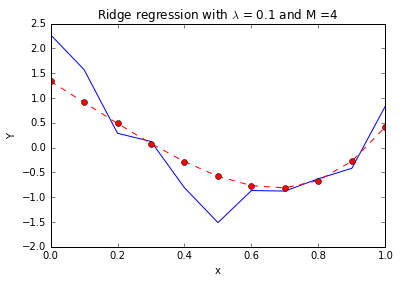

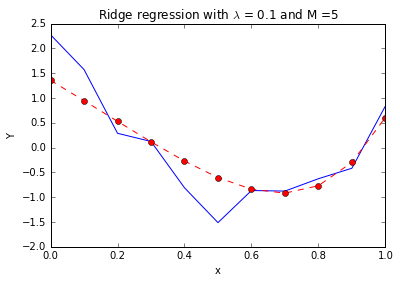

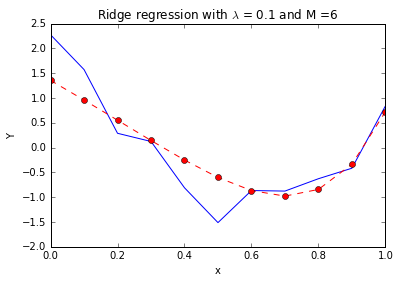

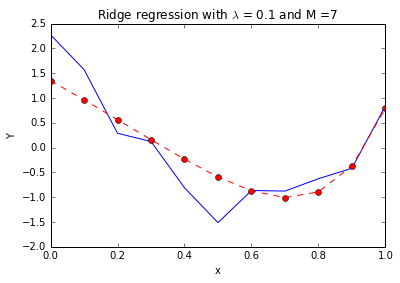

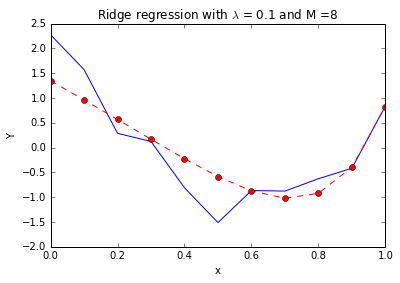

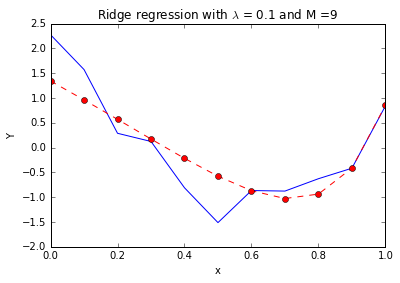

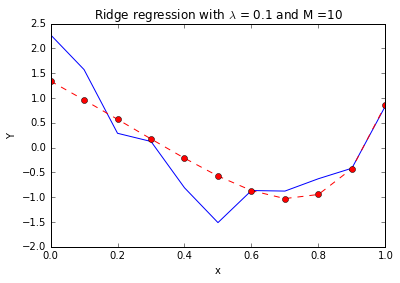

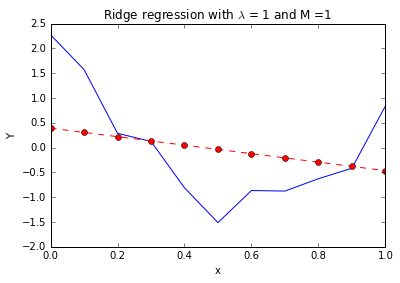

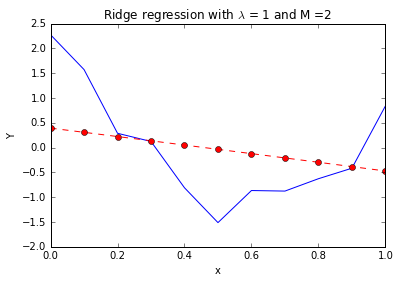

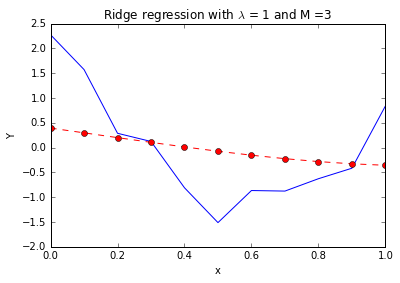

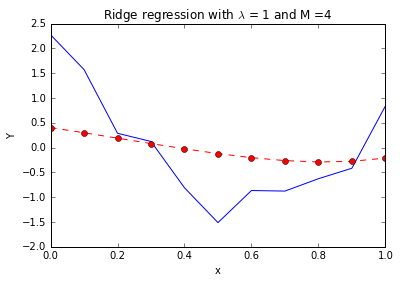

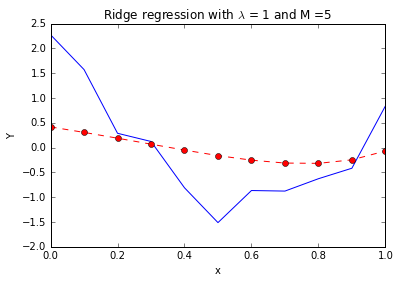

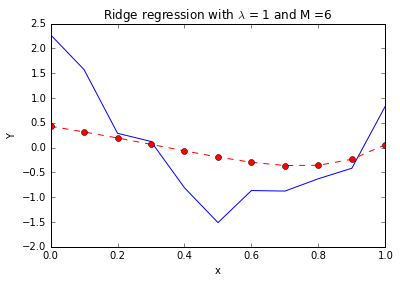

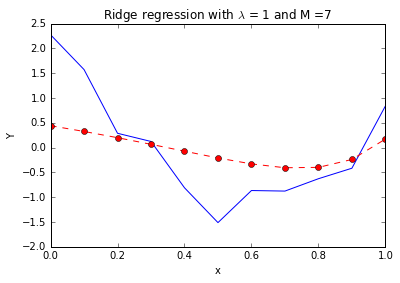

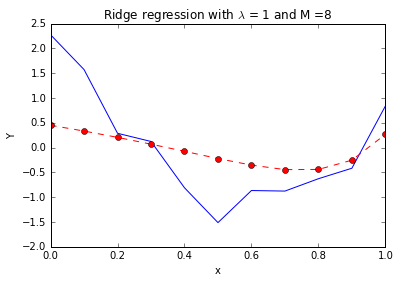

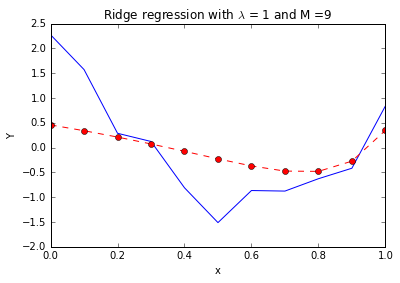

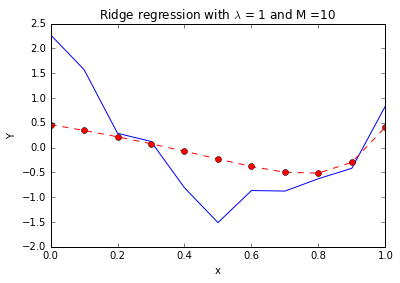

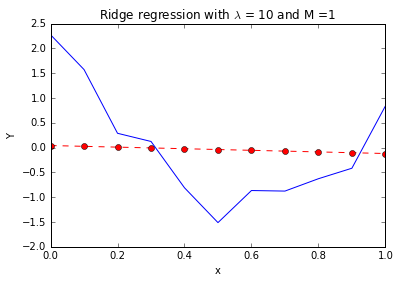

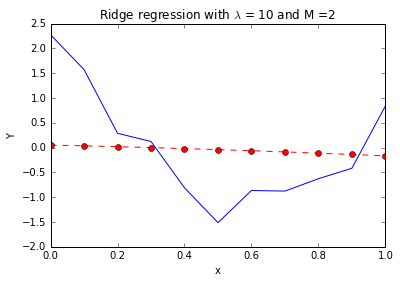

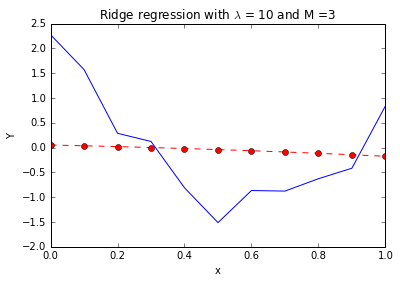

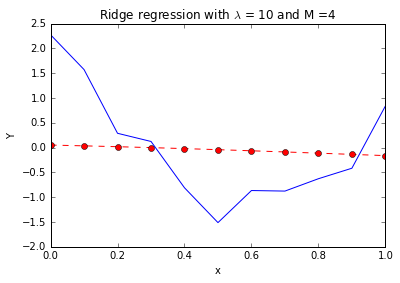

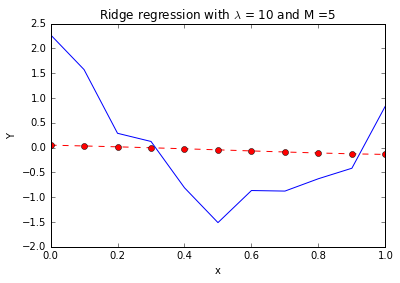

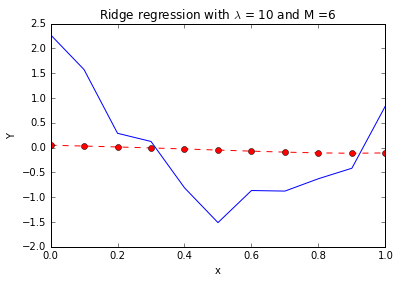

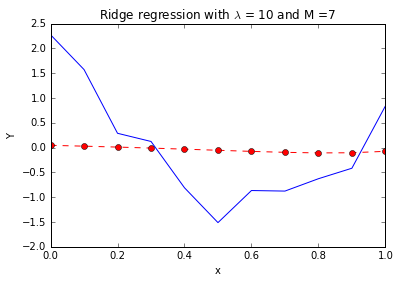

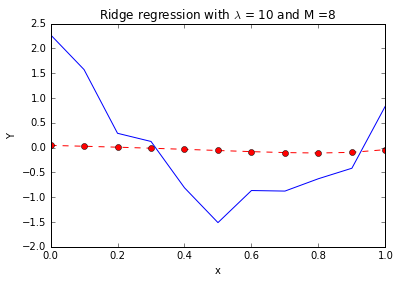

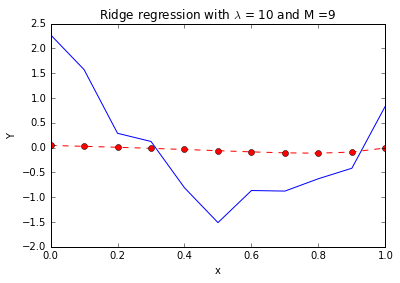

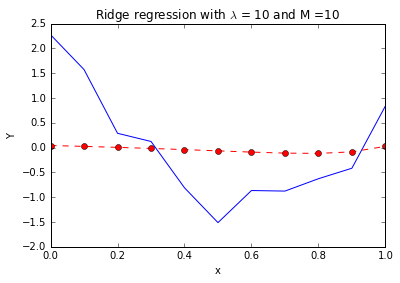

In [40]:
# Load data 
X, Y = rr.getData('curvefittingp2.txt')

def plot_polynomial(X,Y,w,L,M):
    pl.plot(X,Y)
    w_y = [sum([w[i][0]*(x**i) for i in range(len(w))]) for x in X]
    pl.plot(X,w_y, marker='o', linestyle='--', color='r')
    pl.ylabel('Y')
    pl.xlabel('x')
    pl.title('Ridge regression with $\lambda$ = {0} and M ={1}'.format(L,M))
    pl.show()
    
    
L_vals = [0,1e-5,1e-3,1e-1,1,10]
M_vals = [1,2,3,4,5,6,7,8,9,10]
for L in L_vals:
    for M in M_vals:
        w, error = rr.ridge_regression(X, Y, L, M)
        plot_polynomial(X,Y,w,L,M)


2. We have given you three additional data sets: regressA train.txt, regressB train.txt and
regress validate.txt. First, use regressA train.txt as a training data set and regressB train.txt
as a test data set. Then, use regressB train.txt as a training data set and regressA train.txt
as a test data set. Use regress validate.txt as the validation set for both cases. For Matlab
and Python, you can use the provided scripts to read the data sets. Each text file contains data
in the following format: the fist row contains x data, and the second row contains y data: each
row contains the data with %e format as %0.18e %0.18e %0.18e ... %0.18e where a space
exists between the values. In general, we want to use the training data to optimize parameters
and then use the performance of those parameters on the validation data to choose among
models (e.g. values of M and values of λ), this is called “model selection”. Show some values
of M and λ, and show the effect on the fit in the test and validation data. Which values work
best? Explain

We use the validation set to find the value of the hyperparameters (i.e. λ,M) that yields the lowest SSE on that set. Then, you examine the performance on the test set using those optimal hyperparameters. So when we say "optimize M and λ", we are actually testing our fits based on the validation set. That is:
 
1. Fix M,λ and find the optimal w for these fixed values based on the training set.
2. Repeat (1) for many values of M,λ.
3. "Optimize" the hyperparameters by evaluating the fits obtained on the validation set.
4. Examine the performance of the fits on the test set, relative to the "best" fit obtained in 3.

In [46]:
#Load data
xA, yA = rr.regressAData()
xB, yB = rr.regressBData()
xValidate, yValidate = rr.validateData()

In [56]:
# Train on regressA, test on regressB
X = xA
Y = yA

best_score = 1e10
L_vals = [0,1e-5,1e-3,1e-1,1,10]
M_vals = [1,2,3,4,5,6,7,8,9,10]
for L in L_vals:
    for M in M_vals:
        w, error = rr.ridge_regression(X, Y, L, M)
        # calculate error on validation data 
        Y_calc = [sum([w[i][0]*(x**i) for i in range(len(w))]) for x in xValidate]
        squared_error = sum([(Y_calc[i]-yValidate[i])**2 for i in range(len(yValidate))])
        if squared_error < best_score:
            best_score = squared_error
            M_best = M
            L_best = L
            w_best = w
        print M, '\t', L, '\t', squared_error
        
# Test optimal parameters performance on test set

1 	0 	2.89679294546
2 	0 	2.34801980138
3 	0 	2.36982881428
4 	0 	3.57886241466
5 	0 	4.13741882245
6 	0 	3.98359142977
7 	0 	4.06663059683
8 	0 	10.6293092052
9 	0 	26.4476289087
10 	0 	17.4761053931
1 	1e-05 	2.89679693448
2 	1e-05 	2.34802734407
3 	1e-05 	2.36984656739
4 	1e-05 	3.57887067587
5 	1e-05 	4.13739691409
6 	1e-05 	3.98357098031
7 	1e-05 	4.06658399402
8 	1e-05 	10.6120527611
9 	1e-05 	26.3547000487
10 	1e-05 	17.4216891143
1 	0.001 	2.89719199124
2 	0.001 	2.34877428858
3 	0.001 	2.37160451503
4 	0.001 	3.57968961022
5 	0.001 	4.13523386119
6 	0.001 	3.98156083302
7 	0.001 	4.0620279147
8 	0.001 	9.11112741235
9 	0.001 	19.3737329453
10 	0.001 	13.4295869437
1 	0.1 	2.93811283721
2 	0.1 	2.4255529778
3 	0.1 	2.55106201677
4 	0.1 	3.6709218296
5 	0.1 	3.96759768799
6 	0.1 	3.88967745336
7 	0.1 	3.88997801931
8 	0.1 	2.8508253655
9 	0.1 	4.42895993933
10 	0.1 	3.32945466146
1 	1 	3.42055947852
2 	1 	3.24499858182
3 	1 	4.35881868486
4 	1 	4.85603497235
5 	1 	3.98799148517


In [ ]:
# Train on regressB, test on regressA
X = xB
Y = yB

best_score = 1e10
L_vals = [0,1e-5,1e-3,1e-1,1,10]
M_vals = [1,2,3,4,5,6,7,8,9,10]
for L in L_vals:
    for M in M_vals:
        w, error = rr.ridge_regression(X, Y, L, M)
        # calculate error on validation data 
        Y_calc = [sum([w[i][0]*(x**i) for i in range(len(w))]) for x in xValidate]
        squared_error = sum([(Y_calc[i]-yValidate[i])**2 for i in range(len(yValidate))])
        if squared_error < best_score:
            best_score = squared_error
            M_best = M
            L_best = L
            w_best = w
        print M, '\t', L, '\t', squared_error
        
# Test optimal parameters performance on test set